<div align="center">
<h3> CS 178: Machine Learning & Data Mining </h3>
<h1> Discussion, Week 3 </h1>
</div>

Let's start by importing some packages. We'll point out which of these imports we are using throughout the discussion, but it's handy to have them all in one place at the top of your notebook. This way, you can reload the imports without having to re-run everything else.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
     
from sklearn.datasets import fetch_openml, make_moons
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay


seed=1234
np.random.seed(seed)

### k-Nearest Neighbors (kNN)

Let's generate a dataset using the function `sklearn.datasets.make_moons`. This isn't real data corresponding to any real machine learning task, but we can use it to illustrate some concepts.

This dataset has 1000 datapoints and 2 classes. We will again use `matplotlib` to visualize the data.

In [2]:
# Creating 2-moons dataset
n_samples = 1000
noise = 0.3
moon_X, moon_y = make_moons(n_samples, noise=noise)

In [3]:
moon_X.shape

(1000, 2)

In [4]:
moon_y.shape

(1000,)

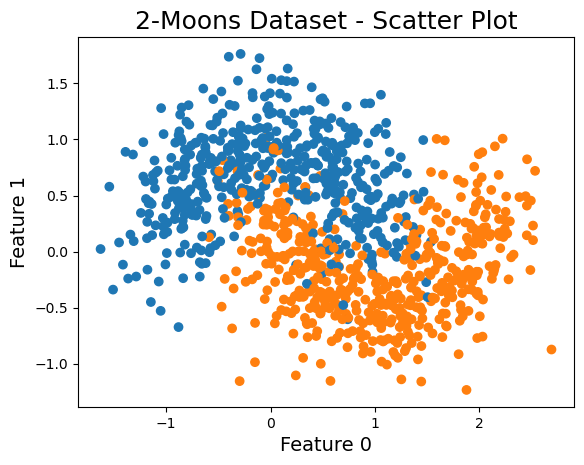

In [5]:
# Make a figure with 1 subplot
fig, axes = plt.subplots()

# Scatter plot of features in X
feature_0 = moon_X[:, 0]  # First column is the first feature
feature_1 = moon_X[:, 1]  # Second column is the second feature

# axes.scatter(feature_0, feature_1, c=moon_y)
axes.scatter(feature_0, feature_1, c=moon_y, cmap='tab10', vmax=10)

axes.set_xlabel('Feature 0', fontsize=14)
axes.set_ylabel('Feature 1', fontsize=14)
axes.set_title('2-Moons Dataset - Scatter Plot', fontsize=18);

Now that we have a better sense of what our dataset looks like, let's train some models!
The approach will be similar to last week's Linear Regression models - the main difference being that we will predict class labels instead of numerical target values.
- First, we'll again split our dataset into a training set and a testing set.

In [6]:
# Create a train/test split of the 2-moons dataset
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(moon_X, moon_y, test_size=test_size, random_state=seed)

In [7]:
X_train.shape

(750, 2)

In [8]:
X_test.shape

(250, 2)

Now, we can create a nearest centroid classifier and fit it on the training data.
- We'll use the sklearn implementation, which is already imported for you with `from sklearn.neighbors import NearestCentroid`.
- After creating a classifier with `NearestCentroid()`, fitting it to the training data is as easy as calling the function `.fit(...)`.
- See the [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html) for more details on this classifier.

In [9]:
# Create a nearest centroid classifier
nc_classifier = NearestCentroid()

# Fit it on the training set
nc_classifier.fit(X_train, y_train);

After training our classifier, let's use it to make predictions.
- We can do this using the method `.predict(...)`.
- We can call the `.predict(...)` method on both the training data and the testing data, in order to make predictions on both sets.

Let's now see how accurate our predictions by computing the accuracy (percentage of correctly classified points) of our model.

In [10]:
# Make predictions on the training and test set
y_pred_train = nc_classifier.predict(X_train)
y_pred_test = nc_classifier.predict(X_test)

# Compute accuracy of predictions on training and test set
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy (train): %.2f%%' % (100 * acc_train))
print('Accuracy (test): %.2f%%' % (100 * acc_test))

Accuracy (train): 80.27%
Accuracy (test): 80.00%


In Homework 2, you are also asked to visualize some decision boundaries. Here's a short demonstration on how to do this.
- You can use the function `DecisionBoundaryDisplay`. This is already imported for you above: `from sklearn.inspection import DecisionBoundaryDisplay`.
- Using the method `.from_estimator(...)`, we can automatically visualize the decision boundaries by passing in a classifier (here, `nc_classifier`) and some data (`X_train`). The argument `response_method='predict'` ensures we are visualizing the "hard" decision boundaries (i.e. not class probabilities), and the argument `alpha=0.5` changes the opacity of the plot.

We see that the nearest centroid classifier has a linear decision boundary, which doesn't fit our dataset very well.

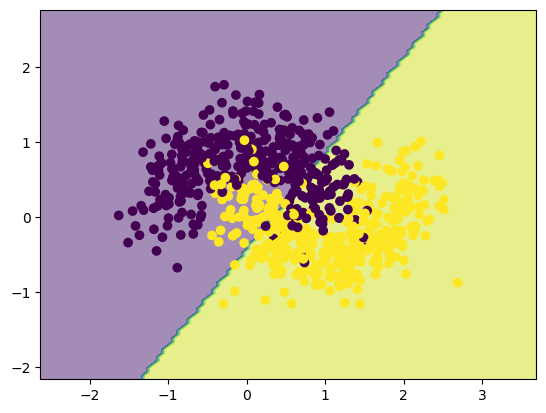

In [11]:
# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    nc_classifier, X_train, response_method='predict', alpha=0.5
)
# Also include a scatter a plot of the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

The nearest centroid classifier gets decent accuracy, but let's see if we can get better performance with a kNN classifier.
- We'll use the sklearn implementation, which is already imported for you with `from sklearn.neighbors import KNeighborsClassifier`.
- You can create a kNN classifier with `k` neighbors by calling `KNeighborsClassifier(n_neighbors=k)`.
- See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for the documentation of this classifier.
- Fitting the model and making predictions is the same as before: we just use the `.fit(...)` and `.predict(...)` methods.

In [12]:
# Create a nearest centroid classifier
k = 5
# Can also try k = 10, 25, 100, etc.
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit it on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = knn_classifier.predict(X_train)

# Make predictions on the testing set
y_pred_test = knn_classifier.predict(X_test)

In [13]:
# Compute accuracy of predictions on training and test set
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy (train): %.2f%%' % (100 * acc_train))
print('Accuracy (test): %.2f%%' % (100 * acc_test))

Accuracy (train): 94.40%
Accuracy (test): 88.80%


As above, we can plot our decision boundary for our kNN classifier.
- Visually, this is a much better fit than the nearest centroid classifier.
- Note also that this is reflected in the higher accuracy of the kNN model.

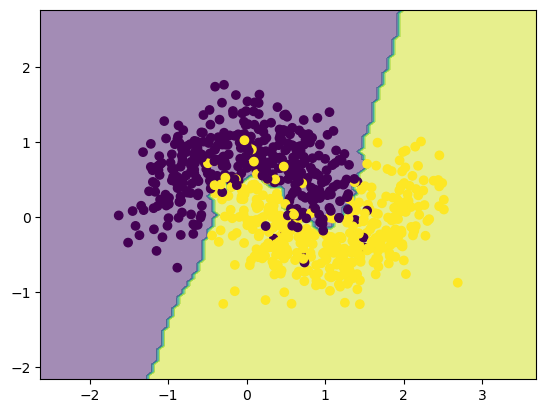

In [14]:
# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    knn_classifier, X_train, response_method='predict', alpha=0.5
)
# Also include a scatter a plot of the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

---

### kNN on MNIST

Now we will see how a nearest centroid classifier does on a more complex image dataset. We will use the MNIST dataset of handwritten numerical digits (0, 1, 2, ..., 9) represented as 28x28 pixel images. The features will be the individual pixel values and the class labels are the corresponding digit that they are supposed to represent.

In [15]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
mnist_X, mnist_y = fetch_openml('mnist_784', as_frame=False, return_X_y=True, parser='auto')

# print(mnist_y[:10])

# Convert labels to integer data type
mnist_y = mnist_y.astype(int)

We will split this dataset into a train and test split, with 75% of the original data belonging to the training portion.

In [16]:
mnist_X_tr, mnist_X_te, mnist_y_tr, mnist_y_te = train_test_split(
    mnist_X, mnist_y, test_size=0.25, random_state=seed, shuffle=True
)

#### Plotting Images

The data comes preprocessed for us into a vector format for the features, so we will need to reshape it first to resemble a grid of pixels (i.e., an image). We can see the actual values by printing the array directly, or we can more naturally visualize it using the `.imshow()` method.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  47 157 241 215 163 137  57   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  72 215 253 253 253 233 254 249 177
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  19 115 243 254 199  49  68  23  62 231 253
  222   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  24 213 253 253 126   4   0   0   0   

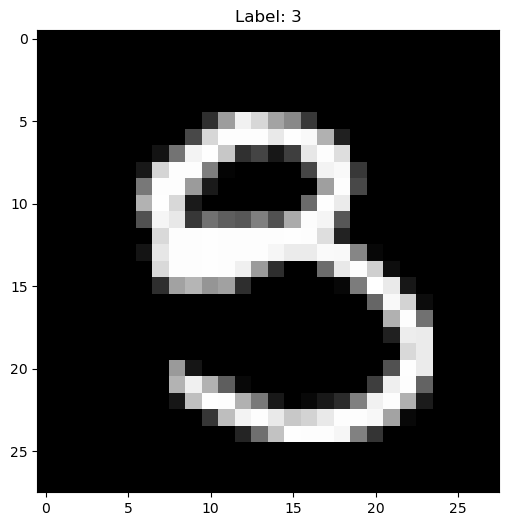

In [17]:
# Some default settings for our plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

figure, axes = plt.subplots(1, 1, figsize=(6, 6))  

idx = 0  # Change to view different images

img = mnist_X_tr[idx].reshape(28, 28)
axes.imshow(img)
label = mnist_y_tr[idx]
axes.set_title(f'Label: {label}')
print(img)

We see that the individual pixel values can take on integer values between 0 (black) and 255 (white).

#### Images as Feature Vectors

For most machine learning methods, we will expect the input features to be in a vector format. Instead of a 28x28 matrix we want it to be in a 784-dimensional vector. Here is what that looks like for the first datapoint.

In [18]:
x = mnist_X_tr[0]
x.shape, x

((784,),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  47, 157, 241, 215, 163, 137,
         57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,

#### Nearest Centroid

Let's fit a Nearest Centroid model to this data to predict a digit label given the pixel values of the image.

In [19]:
euc_nc = NearestCentroid("euclidean")
euc_nc.fit(mnist_X_tr, mnist_y_tr);

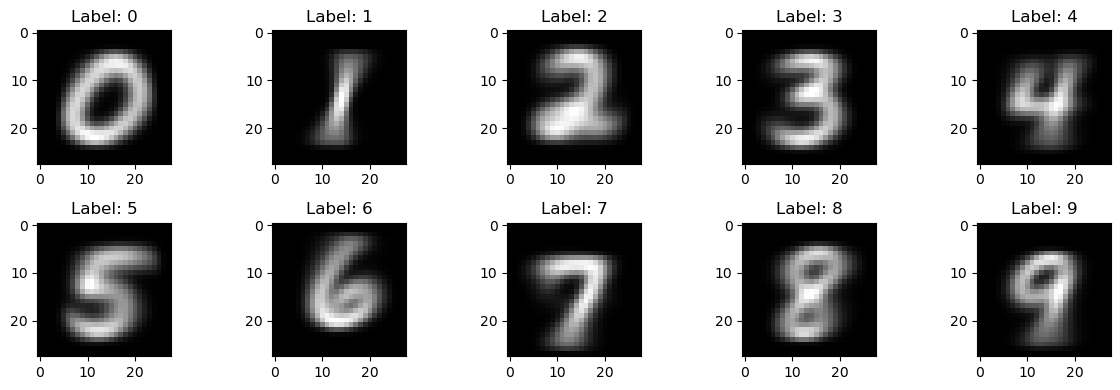

In [20]:
centroids = euc_nc.centroids_
# Create a figure with 2 rows and 5 columns
figure, axes = plt.subplots(2, 5, figsize=(12, 4))  

# Plot the centroids
for i in range(10):
    axes[i//5, i%5].imshow(centroids[i].reshape(28, 28))
    axes[i//5, i%5].set_title(f'Label: {i}')

plt.tight_layout()
plt.show()

Above are the fitted centroids for each of the labels. We don't have to always use Euclidean distance as our distance metric, we are free to choose others - such as Manhattan distance:

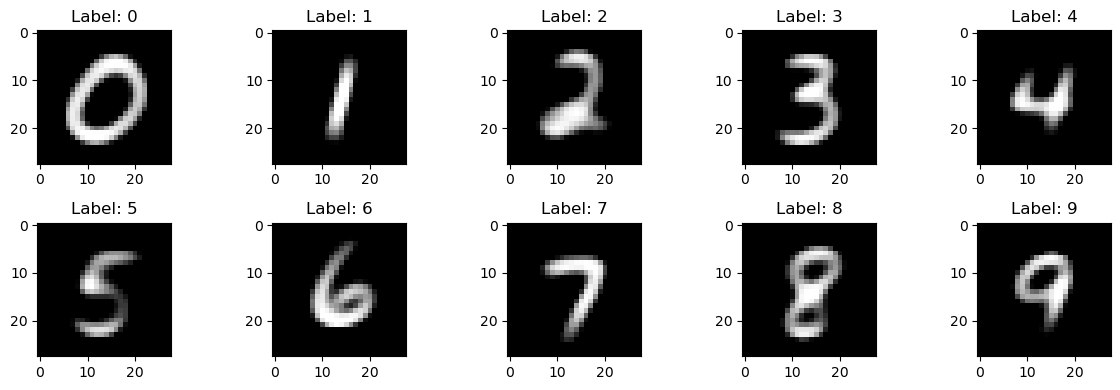

In [21]:
man_nc = NearestCentroid("manhattan")  # manhattan distance = sum(abs(x1-x2))   vs. euclidian distance = sum((x1-x2)^2)
man_nc.fit(mnist_X_tr, mnist_y_tr)

centroids = man_nc.centroids_
# Create a figure with 2 rows and 5 columns
figure, axes = plt.subplots(2, 5, figsize=(12, 4))  

# Plot the centroids
for i in range(10):
    axes[i//5, i%5].imshow(centroids[i].reshape(28, 28))
    axes[i//5, i%5].set_title(f'Label: {i}')

plt.tight_layout()
plt.show()


We can see that the resulting centroids are much sharper. This is due to this distance corresponding to fitting to the median value rather than the mean value that Euclidean distance results in. While this shows us that if we are interested in visualizing data that Manhattan distance might be a better fit, it isn't always going to be the best choice should prediction be your goal.

In [22]:
# Which results in lower validation error?
print("Euclidean NC Accuracy:", accuracy_score(mnist_y_te, euc_nc.predict(mnist_X_te)))
print("Manhattan NC Accuracy:", accuracy_score(mnist_y_te, man_nc.predict(mnist_X_te)))

Euclidean NC Accuracy: 0.8137714285714286
Manhattan NC Accuracy: 0.7428571428571429


#### Impact of Amount of Data

Let's see how the amount of data influences the performance of the Nearest Centroid model.

In [23]:
print('total # training observations', mnist_X_tr.shape[0])

total # training observations 52500


In [24]:
for n in [100, 1000, 5000, 10000, 20000, 30000, 40000, 52500]:
    restricted_X_tr = mnist_X_tr[:n, :]
    restricted_y_tr = mnist_y_tr[:n]
    nc = NearestCentroid('euclidean')
    nc.fit(restricted_X_tr, restricted_y_tr)    
    print("n={} Accuracy: {}".format(n, accuracy_score(mnist_y_te, nc.predict(mnist_X_te))))


n=100 Accuracy: 0.7078285714285715
n=1000 Accuracy: 0.8065714285714286
n=5000 Accuracy: 0.8101714285714285
n=10000 Accuracy: 0.8112571428571429
n=20000 Accuracy: 0.8149714285714286
n=30000 Accuracy: 0.8138285714285715
n=40000 Accuracy: 0.8130857142857143
n=52500 Accuracy: 0.8137714285714286


We can see we start to experience diminishing returns after $n=1000$ datapoints. 

### Understand Yelp dataset

In [25]:
import simplejson as json
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /home/jcwill/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jcwill/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/jcwill/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [26]:
def create_bow_from_reviews(filename, min_pos=4, max_neg=2): 
    
    print('Loading the file:', filename) 
    with open(filename, 'r') as jfile:
        data = json.load(jfile)
        
    print('Total number of reviews extracted =', len(data))

    text = []
    y = []
    print('Extracting tokens from each review.....(can be slow for a large number of reviews)......')   
    for d in data: 	# can substitute data[0:9] here if you want to test this function on just a few reviews 
        review = d['text']     # keep only the text and label
        stars = int(d['stars'])
        if stars >= min_pos:   # represent scores > min_pos as "1"
            score = 1
        elif stars <= max_neg:  # represent scores < max_neg as "0"
            score = 0
        else: # do not consider reviews with scores above max_neg and below min_pos (these reviews will be dropped)
            continue  
 
        text.append(review)   
        y.append(score)
    
    # create an instance of a CountVectorizer, using 
    # (1) the standard 'english' stopword set 
    # (2) only keeping terms in the vocabulary that occur in at least 2% of documents
    # (3) allowing only unigrams in the vocabulary (use "ngram_range=(1, 1)" to do this)
    vectorizer = CountVectorizer(stop_words='english', min_df=0.02, ngram_range=(1, 1))

    # create a sparse BOW array from 'text' using vectorizer
    X = vectorizer.fit_transform(text)
 
    print('Data shape: ', X.shape)
    
    # you can uncomment this next line if you want to see the full list of tokens in the vocabulary  
    #print('Vocabulary: ', vectorizer.get_feature_names())
 
    return X, y, vectorizer, text

In [27]:
with open('yelp_reviews.json', 'r') as jfile:
    data = json.load(jfile)

In [28]:
# the first review is labelled as positive (label=1)
data[0]

{'review_id': 'VfBHSwC5Vz_pbFluy07i9Q',
 'user_id': 'cjpdDjZyprfyDG3RlkVG3w',
 'business_id': 'uYHaNptLzDLoV_JZ_MuzUA',
 'stars': 5,
 'date': '2016-07-12',
 'text': 'My girlfriend and I stayed here for 3 nights and loved it. The location of this hotel and very decent price makes this an amazing deal. When you walk out the front door Scott Monument and Princes street are right in front of you, Edinburgh Castle and the Royal Mile is a 2 minute walk via a close right around the corner, and there are so many hidden gems nearby including Calton Hill and the newly opened Arches that made this location incredible.\n\nThe hotel itself was also very nice with a reasonably priced bar, very considerate staff, and small but comfortable rooms with excellent bathrooms and showers. Only two minor complaints are no telephones in room for room service (not a huge deal for us) and no AC in the room, but they have huge windows which can be fully opened. The staff were incredible though, letting us borrow

In [29]:
# the 17th review is labelled as negative (label=0)
data[16]

{'review_id': 'ByRzJ8rF2KJWLr-cUNU6EA',
 'user_id': 'kzyLOqiJvyw_FWFTw2rjiQ',
 'business_id': 'jQsNFOzDpxPmOurSWCg1vQ',
 'stars': 1,
 'date': '2017-06-03',
 'text': 'This place is horrible, we were so excited to try it since I got a gift card for my birthday. We went in an ordered are whole meal and they did not except are gift card, because their system was down. Unacceptable, this would have been so helpful if we would have known this prior!!',
 'useful': 0,
 'funny': 0,
 'cool': 0}

In [30]:
# the 2nd review is dropped since its score is above max_neg and below min_pos
data[1]

{'review_id': '3zRpneRKDsOPq92tq7ybAA',
 'user_id': 'bjTcT8Ty4cJZhEOEo01FGA',
 'business_id': 'uYHaNptLzDLoV_JZ_MuzUA',
 'stars': 3,
 'date': '2016-10-02',
 'text': "If you need an inexpensive place to stay for a night or two then you may consider this place but for a longer stay I'd recommend somewhere with better amenities. \n\nPros:\nGreat location- you're right by the train station, central location to get to old town and new town, and right by sight seeing his tours. Food, bars, and shopping all within walking distance. Location, location, location.\nVery clean and very good maid service\n\nCons:\nTiny rooms \nUncomfortable bed \nAbsolutely no amenities \nNo phone in room \nNo wardrobe \n\nWas given a lot of attitude about me and my husband sharing a room which was quite strange and we were charged 15 pounds more for double occupancy not sure why that matters I felt like it was a money grab. It was just handled in a kind of odd manner to me... \n\nIf you book this hotel all you ge

In [31]:
X, y, vectorizer_BOW, text = create_bow_from_reviews('yelp_reviews.json') 

Loading the file: yelp_reviews.json
Total number of reviews extracted = 20000
Extracting tokens from each review.....(can be slow for a large number of reviews)......
Data shape:  (17501, 404)


In [32]:
# A mapping of terms to feature indices.
vocabulary = vectorizer_BOW.vocabulary_
# sorted_vocabulary = dict(sorted(vocabulary.items(), key=lambda item: item[1]))
print(vocabulary)

{'loved': 201, 'location': 192, 'decent': 73, 'price': 258, 'makes': 204, 'amazing': 10, 'deal': 72, 'walk': 377, 'door': 91, 'street': 329, 'right': 282, 'castle': 47, 'minute': 214, 'close': 55, 'nice': 222, 'bar': 22, 'staff': 320, 'small': 314, 'excellent': 106, 'room': 286, 'service': 306, 'huge': 162, 'gave': 134, 'free': 126, 'highly': 156, 'recommend': 271, 'friends': 131, 'return': 277, 'definitely': 76, 'open': 229, 'hours': 160, 'helpful': 154, 'lot': 198, 'food': 125, 'breakfast': 35, 'style': 332, 'want': 379, 'look': 194, 'don': 90, 'far': 116, 'easy': 95, 'old': 228, 'town': 357, 'new': 221, 'view': 370, 'got': 141, 'bit': 32, 'just': 171, 'plus': 252, 'best': 29, 'super': 333, 'beautiful': 24, 'great': 142, 'review': 278, 'think': 349, 'won': 391, 'really': 268, 'good': 140, 'wanted': 380, 'did': 79, 'day': 70, 'time': 351, 'group': 143, 'pretty': 257, 'big': 31, 'clean': 54, 'need': 218, 'actually': 8, 'didn': 80, 'use': 364, 'hard': 150, 'come': 58, 'paid': 236, 'say'

In [33]:
# stop words
# Terms that were ignored because they either:
# occurred in too many documents (max_df)
# occurred in too few documents (min_df)
# were cut off by feature selection (max_features).
stop_words = vectorizer_BOW.stop_words_
# print(stop_words)

#### after preprocessing

In [34]:
# 9264th raw text
text[9263]

'Always decent service and good breakfast food.'

In [35]:
# 9264th bag-of-words feature, indicating the number of the 𝑗th term in the vocabulary existing in this review
X[9263].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
# let's see what the non-zero element in the above array corresponds to....
term_idx = np.where(X[9263].toarray()>0)[1]
for term_id in term_idx:
    print(term_id, '\t', list(vocabulary.keys())[list(vocabulary.values()).index(term_id)])

35 	 breakfast
73 	 decent
125 	 food
140 	 good
306 	 service
